In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2

from sklearn import linear_model
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

import joblib as jb

%matplotlib inline

In [2]:
df = pd.read_csv('emnist-letters-train.csv', names=range(0,785))

In [3]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,16,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
label, arr = df[0], df.loc[:, 1:]

<Figure size 640x480 with 0 Axes>

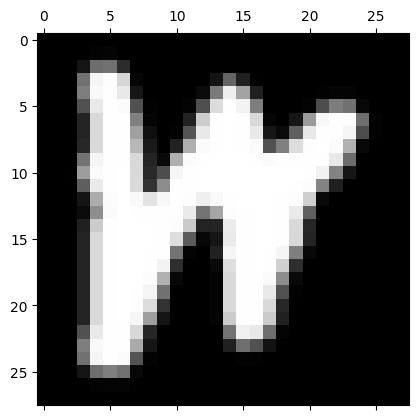

In [5]:
x = np.array(arr.loc[0])
x = x.reshape(28,28)
x = np.transpose(x)

plt.gray()
plt.matshow(x)
# cv2.imwrite('character.png', x)

In [22]:
# data = []

# for i in range(len(arr)):
#     x = np.array(arr.loc[i])
#     x = x.reshape(28,28)
#     x = np.transpose(x)
#     data.append(x)

In [25]:
model = linear_model.LogisticRegression()
model.fit(arr, label)

/home/vanshdev/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [7]:
test = pd.read_csv('emnist-letters-test.csv', names=range(0,785))
test_label, test_arr = test[0], test.loc[:, 1:]

In [27]:
model.score(test_arr, test_label)

0.6997972972972973

In [29]:
model2 = RandomForestClassifier()
model2.fit(arr, label)

RandomForestClassifier()

In [30]:
model2.score(test_arr, test_label)

0.8622297297297298

In [12]:
#character.png is the 28x28 pixel image of W
img = cv2.imread('character.png', cv2.IMREAD_GRAYSCALE)

In [13]:
final_img = img.reshape(784)

In [62]:
model2.predict([final_img])

array([23])

Random Forest Classifier predicted the input image correctly

In [6]:
model3 = SVC()
model3.fit(arr, label)

SVC()

In [8]:
model3.score(test_arr, test_label)

0.8898648648648648

In [10]:
jb.dump(model3, 'model')

['model']

In [2]:
mode = jb.load('model')

In [14]:
mode.predict([final_img])

array([23])

In [3]:
img = cv2.imread('input.png')

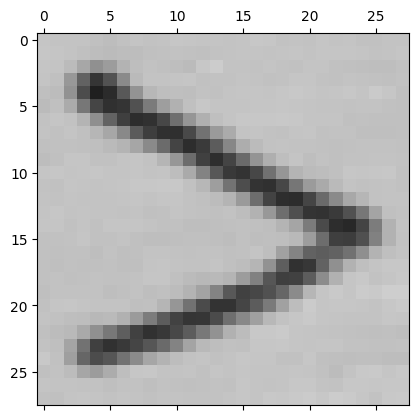

In [4]:
plt.matshow(img)

In [18]:
lower = np.array([0,10,0])
upper = np.array([10,255,255])

In [19]:
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

In [20]:
mask = cv2.inRange(hsv, lower, upper)
res = cv2.bitwise_and(img, img, mask=mask)

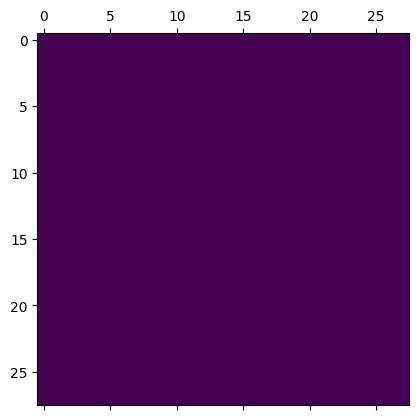

In [21]:
plt.matshow(mask)

In [24]:
res = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY)[1]

In [26]:
res = cv2.bitwise_not(res, res)

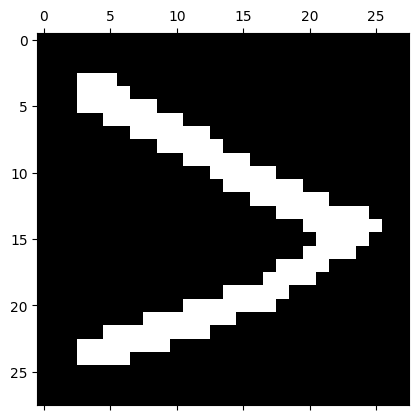

In [27]:
plt.matshow(res)

In [28]:
input = res.reshape(784)

ValueError: cannot reshape array of size 2352 into shape (784,)

In [31]:
img.shape

(28, 28, 3)

In [34]:
r = cv2.resize(res, (28,28))

In [35]:
r.shape

(28, 28, 3)